In [1]:
from pathlib import Path
import pandas as pd

# Ruta 
BASE = Path.cwd()
PATH_CCQ = BASE / "data_raw" / "mafi" / "ccq_cartera_edades_cliente_plano.xlsx"

# Lectura
df_ccq = pd.read_excel(PATH_CCQ, engine="openpyxl")

# Resumen
print(f"Filas: {len(df_ccq):,} | Columnas: {len(df_ccq.columns)}")
print("Columnas:")
print(list(df_ccq.columns))

display(df_ccq.head(10))


Filas: 107,206 | Columnas: 76
Columnas:
['Num_reg', 'Edad_cartera', 'Nombre_edad', 'Edad_cartera1', 'Edad_cartera2', 'Edad_cartera3', 'Edad_cartera4', 'Edad_cartera5', 'Edad_cartera6', 'Edad_cartera7', 'Edad_cartera8', 'Edad_cartera9', 'Edad_cartera10', 'Edad_cartera11', 'Edad_cartera12', 'Edad_cartera13', 'Edad_cartera14', 'Dias', 'Saldo', 'Organizacion', 'Tipo_cliente', 'Nombre_tipo_cliente', 'Tipo_cartera', 'Tipo_documento', 'Nombre_tipo_documento', 'Documento', 'Nombre_documento', 'Numero_credito', 'Identificacion', 'Cliente', 'Control_saldo', 'Grupo', 'Concepto_nota', 'Nombre_concepto', 'Causa_nota', 'Nombre_causa_nota', 'Clasificador', 'Referencia', 'Nombre_referencia', 'Concepto', 'Fecha', 'Fecha_vence', 'Periodo', 'Nombre_periodo', 'Organizacion_liquidacion', 'Documento_liquidacion', 'Liquidacion_orden', 'Organizacion_centro', 'Centro_costo', 'Nombre_centro_costo', 'Fondo', 'Nombre_fondo', 'Fuente_funcion', 'Nombre_fuente_funcion', 'Descripcion', 'Valor_total', 'Valor_descuento

,Num_reg,Edad_cartera,Nombre_edad,Edad_cartera1,Edad_cartera2,Edad_cartera3,Edad_cartera4,Edad_cartera5,Edad_cartera6,Edad_cartera7,...,Valor_afectado,Fecha_cancelacion,Organizacion_origen,Documento_origen,Numero_origen,Estado,Credito,Cuota,Concepto_credito,Nombre_concepto_credito
0,3,3,DE 61 A 90 DIAS,0,0,481,0,0,0,0,...,0,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN,NaN
1,3,3,DE 61 A 90 DIAS,0,0,1,0,0,0,0,...,0,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN,NaN
2,1,1,DE 0 A 30 DIAS,-958,0,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN,NaN
3,4,4,DE 91 A 180 DIAS,0,0,0,-2295,0,0,0,...,0,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN,NaN
4,4,4,DE 91 A 180 DIAS,0,0,0,-450,0,0,0,...,0,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN,NaN
5,6,6,MAS DE 360 DIAS,0,0,0,0,0,276000,0,...,0,NaN,NaN,NaN,NaN,V,8346.0,2.0,C,CAPITAL
6,6,6,MAS DE 360 DIAS,0,0,0,0,0,276000,0,...,0,NaN,NaN,NaN,NaN,V,8346.0,3.0,C,CAPITAL
7,6,6,MAS DE 360 DIAS,0,0,0,0,0,112125,0,...,0,NaN,NaN,NaN,NaN,V,8385.0,8.0,C,CAPITAL
8,6,6,MAS DE 360 DIAS,0,0,0,0,0,112125,0,...,0,NaN,NaN,NaN,NaN,V,8386.0,1.0,C,CAPITAL
9,6,6,MAS DE 360 DIAS,0,0,0,0,0,112125,0,...,0,NaN,NaN,NaN,NaN,V,8386.0,2.0,C,CAPITAL


,observaciones_nivel_cliente,clientes_unicos,saldo_total_est,saldo_en_mora_est,porc_saldo_en_mora_est,periodo_min,periodo_max
0,22446,22446,"8,268,416,788","7,890,916,635",95.43,201803,203002


,variable,n_no_nulos,porc_faltantes,cardinalidad,dtype
0,bucket_edad,22446,0.0,6,category
1,dias_venc,22446,0.0,261,int64
2,mora_flag,22446,0.0,2,int8
3,periodo,22446,0.0,108,int32
4,saldo_est,22446,0.0,7038,int64


Distribución por bucket_edad (%)


,categoria,pct
0,120+,76.53
1,0,18.92
2,91-120,3.35
3,1-30,0.48
4,61-90,0.44
5,31-60,0.28


Distribución por periodo (%)


,categoria,pct
0,202601,13.57
1,202602,12.16
2,202512,8.55
3,202511,6.34
4,202603,5.79
5,202510,4.46
6,202509,3.42
7,202604,3.19
8,202508,2.49
9,202607,2.24


Mora (0/1) en vista cliente (%)


,categoria,pct
0,0 días,100.0


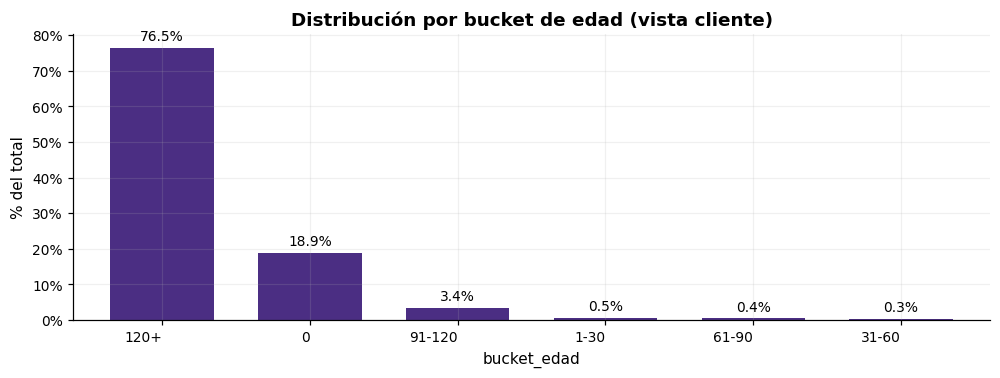

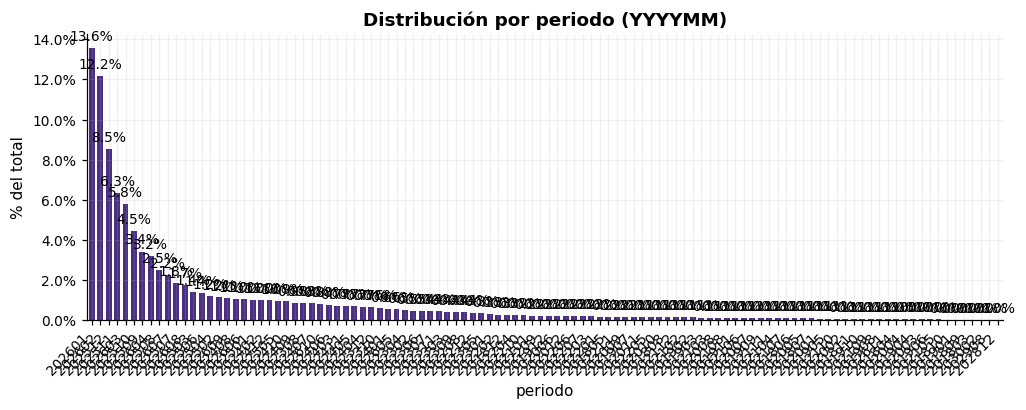

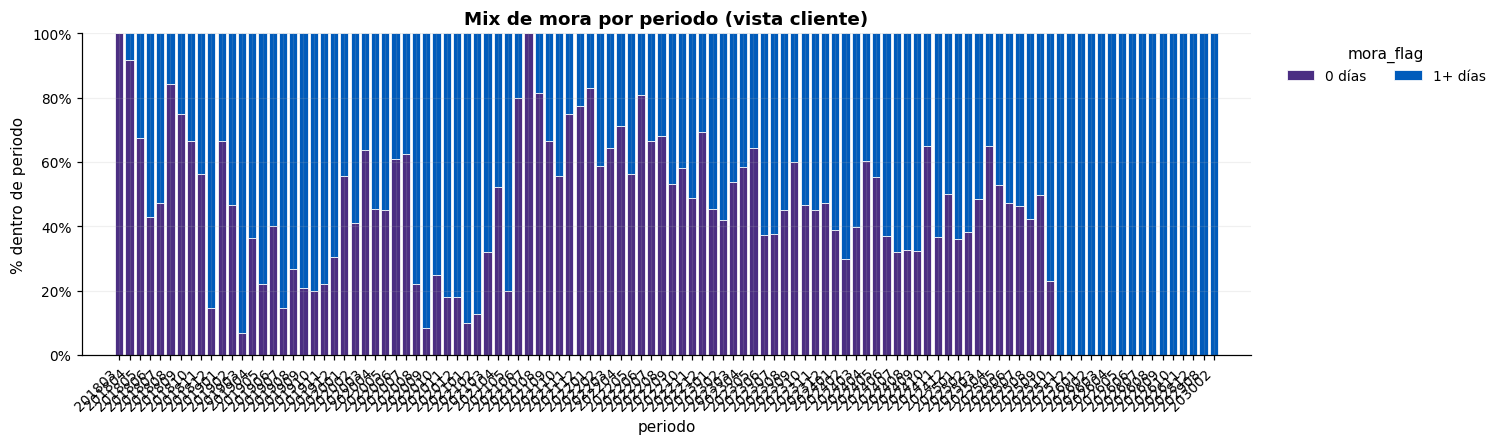

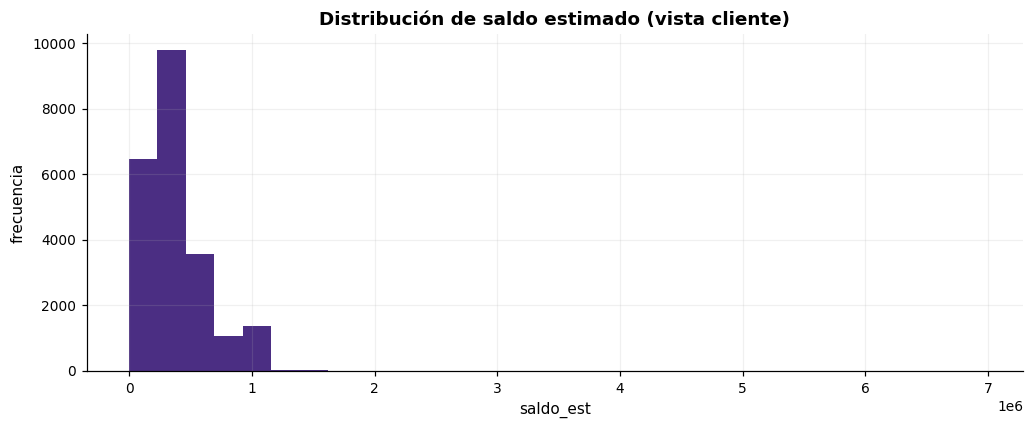

In [4]:
# EDA CCq — Cartera Edades Cliente
import pandas as pd, numpy as np, matplotlib.pyplot as plt, re
from matplotlib.ticker import PercentFormatter
from cycler import cycler
from pathlib import Path

# Estilo visual
plt.rcParams.update({
    "figure.dpi":110,"axes.spines.top":False,"axes.spines.right":False,"axes.grid":True,
    "grid.alpha":0.18,"axes.titleweight":"bold","axes.titlesize":12,"axes.labelsize":10,
    "xtick.labelsize":9,"ytick.labelsize":9,"legend.frameon":False,"legend.fontsize":9,
    "axes.prop_cycle":cycler(color=["#4B2E83","#005BBB","#7F56D9","#1F7A8C","#E67E22","#2D3748","#3BA99C"])
})
def _annot_pct(ax):
    for p in ax.patches:
        h=p.get_height()
        if not (np.isnan(h) or h==0):
            ax.annotate(f"{h:.1f}%",(p.get_x()+p.get_width()/2,h),
                        ha="center",va="bottom",fontsize=9,xytext=(0,3),textcoords="offset points")

def bar_pct(series, title, xlabel, top=None, rot=45, width=0.7):
    s=series.dropna()
    if s.empty: 
        print(f"(sin datos para {title})"); 
        return
    pct=(s.value_counts(normalize=True)*100).sort_values(ascending=False)
    if top: pct=pct.head(top)
    fig,ax=plt.subplots(figsize=(9.8,4))
    pct.plot(kind="bar",ax=ax,width=width)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel("% del total")
    ax.yaxis.set_major_formatter(PercentFormatter(100)); _annot_pct(ax)
    plt.xticks(rotation=rot,ha="right")
    ax.margins(x=0.03)  
    plt.subplots_adjust(left=0.07,right=0.92,bottom=0.25,top=0.90)
    plt.show()

def hist_nice(x, title, xlabel, bins=30):
    x=x.dropna()
    if x.empty: print(f"(sin datos para {title})"); return
    fig,ax=plt.subplots(figsize=(9.5,4))
    ax.hist(x.values, bins=bins)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel("frecuencia")
    plt.tight_layout(); plt.show()

# Limpieza y transformación inicial
df = df_ccq.copy()

# Columnas clave 
col_id   = "Identificacion" if "Identificacion" in df.columns else "Cliente"
col_cli  = "Cliente" if "Cliente" in df.columns else col_id
col_fdoc = "Fecha_documento"
col_fven = "Fecha_vencimiento"
col_vdoc = "Valor_documento"
col_vaf  = "Valor_afectado"
col_estado = "Estado" if "Estado" in df.columns else None
col_nombre_edad = "Nombre_edad" if "Nombre_edad" in df.columns else None
col_edad_cartera = "Edad_cartera" if "Edad_cartera" in df.columns else None

# Fechas
for c in [col_fdoc, col_fven]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce", dayfirst=True)

# Montos
def to_number(s):
    return pd.to_numeric(
        s.astype(str).str.replace(r"[^\d,\.-]","", regex=True)
         .str.replace(".","", regex=False).str.replace(",",".", regex=False),
        errors="coerce"
    )
if col_vdoc in df.columns: df[col_vdoc] = to_number(df[col_vdoc])
if col_vaf  in df.columns: df[col_vaf]  = to_number(df[col_vaf])

# Vista a nivel cliente (última Fecha_vencimiento) 
df_last = (df.sort_values([col_cli, col_fven])
             .dropna(subset=[col_cli, col_fven])
             .drop_duplicates(subset=[col_cli], keep="last")
             .reset_index(drop=True))

# Días de vencimiento = Fecha_vencimiento - Fecha_documento
df_last["dias_venc"] = (df_last[col_fven] - df_last[col_fdoc]).dt.days
df_last["dias_venc"] = df_last["dias_venc"].clip(lower=0)

# Buckets por días 
bins   = [-1,0,30,60,90,120,999999]
labels = ["0","1-30","31-60","61-90","91-120","120+"]
df_last["bucket_edad"] = pd.cut(df_last["dias_venc"], bins=bins, labels=labels, right=True)

# Saldo estimado
if {col_vdoc, col_vaf}.issubset(df_last.columns):
    df_last["saldo_est"] = (df_last[col_vdoc] - df_last[col_vaf]).clip(lower=0)
else:
    df_last["saldo_est"] = np.nan

# Periodo YYYYMM a partir de Fecha_vencimiento
df_last["periodo"] = df_last[col_fven].dt.year*100 + df_last[col_fven].dt.month

df_last["mora_flag"] = (df_last["dias_venc"]>0).astype("int8")

# Tablas de informe
present = [c for c in ["periodo","dias_venc","bucket_edad","saldo_est","mora_flag", col_estado, col_nombre_edad] if c in df_last.columns]

n_clientes = df_last[col_cli].nunique()
saldo_total = float(df_last["saldo_est"].sum()) if "saldo_est" in df_last else np.nan
saldo_mora  = float(df_last.loc[df_last["mora_flag"]==1, "saldo_est"].sum()) if {"saldo_est","mora_flag"}.issubset(df_last.columns) else np.nan
pct_saldo_mora = (saldo_mora/saldo_total*100) if (pd.notna(saldo_total) and saldo_total>0) else np.nan

tabla_ejecutiva = pd.DataFrame({
    "observaciones_nivel_cliente":[len(df_last)],
    "clientes_unicos":[n_clientes],
    "saldo_total_est":[saldo_total],
    "saldo_en_mora_est":[saldo_mora],
    "porc_saldo_en_mora_est":[round(pct_saldo_mora,2)],
    "periodo_min":[int(df_last["periodo"].min()) if df_last["periodo"].notna().any() else np.nan],
    "periodo_max":[int(df_last["periodo"].max()) if df_last["periodo"].notna().any() else np.nan],
})
display(tabla_ejecutiva.style.format({"saldo_total_est":"{:,.0f}","saldo_en_mora_est":"{:,.0f}","porc_saldo_en_mora_est":"{:.2f}"}))

qc_vars = ["periodo","dias_venc","bucket_edad","saldo_est","mora_flag"]
qc = pd.DataFrame({
    "variable": qc_vars,
    "n_no_nulos": [df_last[v].notna().sum() for v in qc_vars],
    "porc_faltantes": [round(df_last[v].isna().mean()*100,2) for v in qc_vars],
    "cardinalidad": [df_last[v].nunique(dropna=True) for v in qc_vars],
    "dtype": [str(df_last[v].dtype) for v in qc_vars],
}).sort_values("variable").reset_index(drop=True)
display(qc)

def tabla_pct(series, top=None):
    s=series.dropna()
    if s.empty: return pd.DataFrame(columns=["categoria","pct"])
    t=(s.value_counts(normalize=True)*100).sort_values(ascending=False)
    if top: t=t.head(top)
    return t.round(2).rename_axis("categoria").reset_index(name="pct")

tbl_bucket = tabla_pct(df_last["bucket_edad"])
tbl_per    = tabla_pct(df_last["periodo"])
tbl_mora   = tabla_pct(df_last["mora_flag"].map({0:"0 días","1":"1+"}).fillna("0 días"))
print("Distribución por bucket_edad (%)"); display(tbl_bucket)
print("Distribución por periodo (%)");     display(tbl_per.head(15))
print("Mora (0/1) en vista cliente (%)");  display(tbl_mora)

# Gráficos 
bar_pct(df_last["bucket_edad"], "Distribución por bucket de edad (vista cliente)", "bucket_edad", rot=0)
bar_pct(df_last["periodo"], "Distribución por periodo (YYYYMM)", "periodo", rot=45)

# Evolución del mix de mora por periodo 
pv = pd.crosstab(df_last["periodo"], df_last["mora_flag"].map({0:"0 días",1:"1+ días"}), normalize="index")*100
if not pv.empty:
    pv = pv.sort_index()
    fig,ax=plt.subplots(figsize=(12.5,4.5))
    left=np.zeros(len(pv))
    for c in pv.columns:
        vals=pv[c].values
        ax.bar(pv.index.astype(str), vals, bottom=left, label=str(c), edgecolor="white", linewidth=0.5)
        left+=vals
    ax.set_title("Mix de mora por periodo (vista cliente)"); ax.set_xlabel("periodo"); ax.set_ylabel("% dentro de periodo")
    ax.yaxis.set_major_formatter(PercentFormatter(100))
    ax.legend(title="mora_flag", ncols=min(len(pv.columns),8), bbox_to_anchor=(1.02,1), loc="upper left")
    plt.xticks(rotation=45, ha="right"); ax.margins(x=0.03); plt.subplots_adjust(left=0.07,right=0.92,bottom=0.25,top=0.90)
    plt.show()

# Distribución de montos
hist_nice(df_last["saldo_est"].clip(lower=0), "Distribución de saldo estimado (vista cliente)", "saldo_est")